In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [55]:
img = cv2.imread('D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\train\\Tidak-Memakai-Helm\\image_005.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

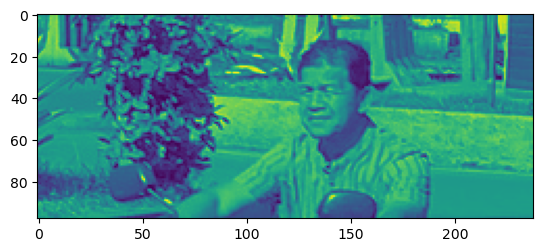

In [ ]:
plt.imshow(img

In [5]:
img = cv2.resize(img, (128, 128))

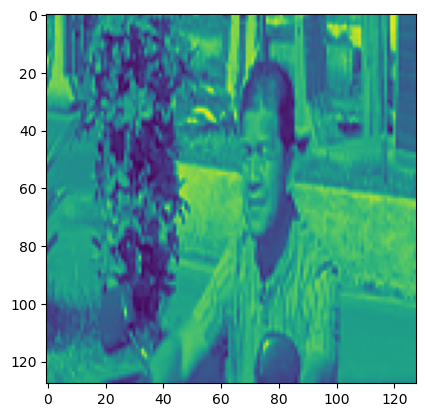

In [6]:
plt.imshow(img)

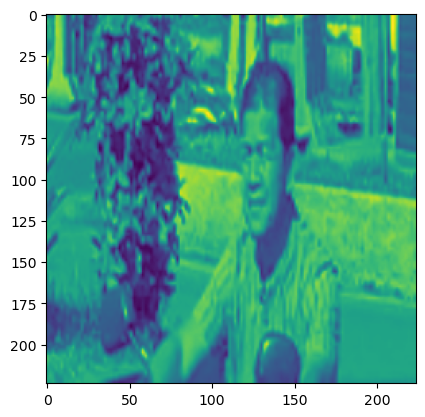

In [7]:
img = cv2.resize(img, (224, 224))
plt.imshow(img)

In [10]:
cv2.namedWindow('tes')
while True:
    cv2.imshow('tes',img)

    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


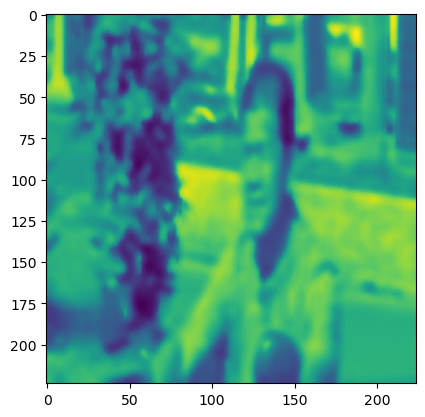

In [8]:
bilateral_filtered = cv2.bilateralFilter(img, 9, 75, 75)
plt.imshow(bilateral_filtered)

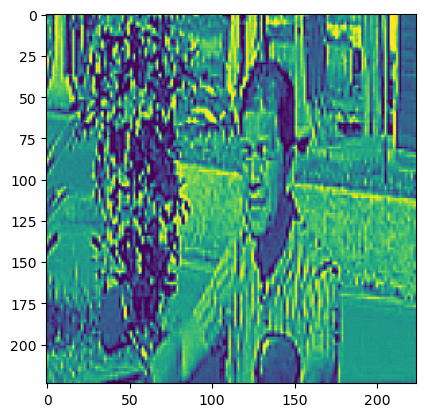

In [9]:
sharpening_kernel = np.array([[-1, -1, -1], 
                              [-1,  9, -1], 
                              [-1, -1, -1]])
sharpened = cv2.filter2D(img, -1, sharpening_kernel)
plt.imshow(sharpened)

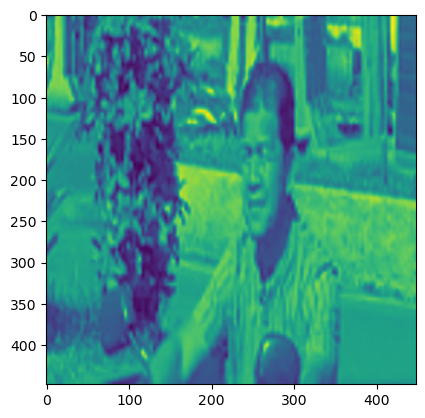

In [10]:
scale_factor = 2  # Perbesar 2x
super_res = cv2.resize(img, (img.shape[1] * scale_factor, img.shape[0] * scale_factor), interpolation=cv2.INTER_CUBIC)
plt.imshow(super_res)

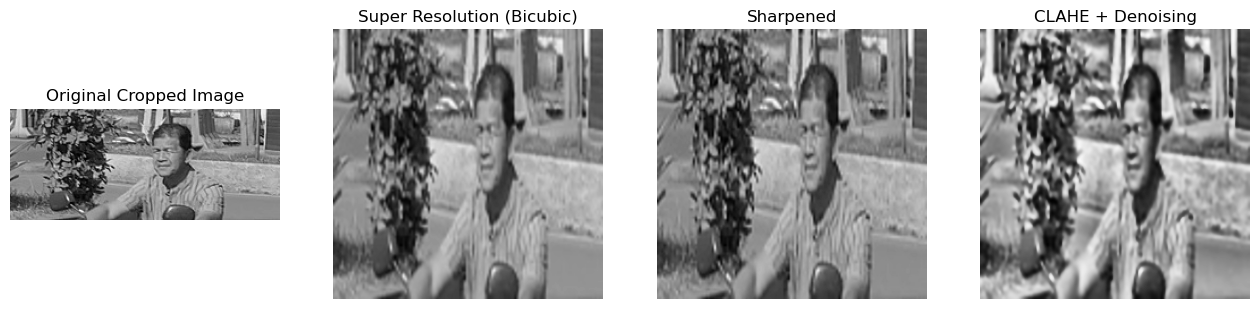

In [56]:
gaussian_blurred = cv2.GaussianBlur(super_res, (0, 0), 2)
sharpened = cv2.addWeighted(super_res, 1.5, gaussian_blurred, -0.5, 0)

# 3. CLAHE (Contrast Enhancement)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(sharpened)

# 4. Denoising menggunakan Bilateral Filter
denoised = cv2.bilateralFilter(clahe_image, 9, 75, 75)

# Menampilkan hasil
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
titles = ["Original Cropped Image", "Super Resolution (Bicubic)", "Sharpened", "CLAHE + Denoising"]
images = [img, super_res, sharpened, denoised]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.show()

# denoised = cv2.cvtColor(denoised, cv2.COLOR_GRAY2RGB)
# plt.imshow(denoised)


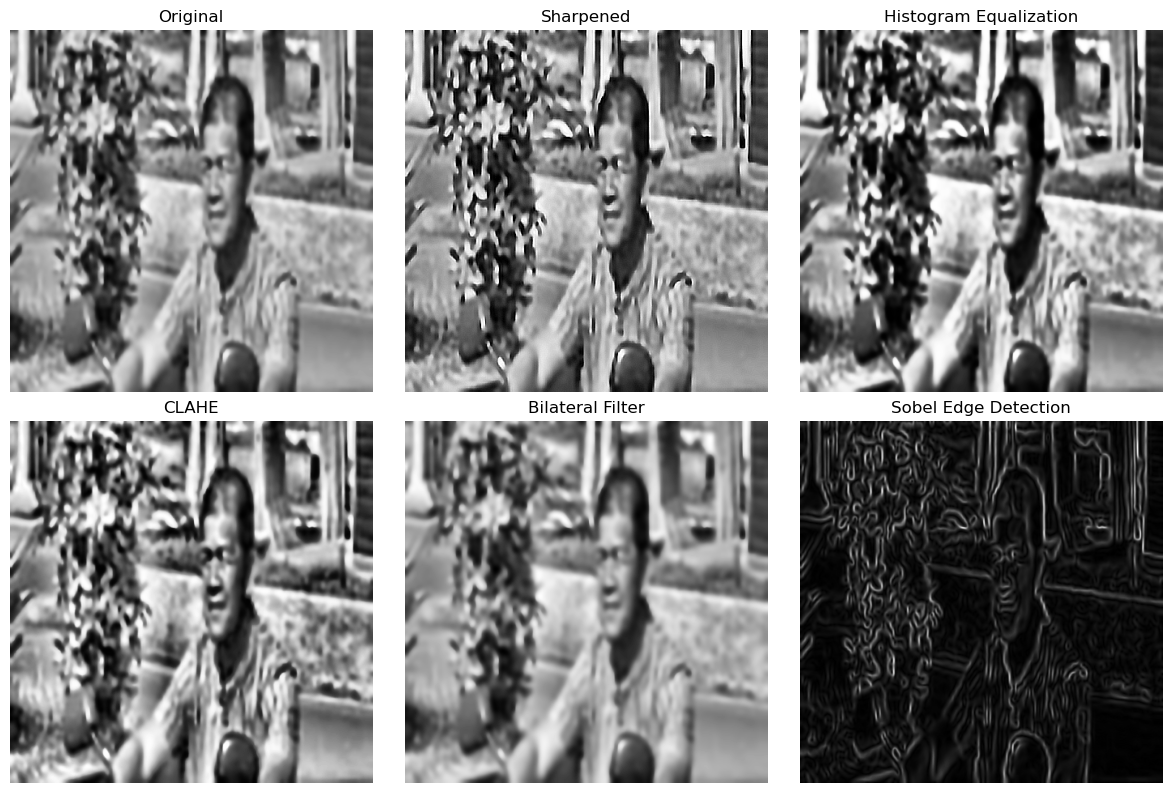

In [12]:
sharpening_kernel = np.array([[-1, -1, -1], 
                              [-1,  9, -1], 
                              [-1, -1, -1]])
sharpened = cv2.filter2D(img, -1, sharpening_kernel)

# 2. Histogram Equalization
equalized = cv2.equalizeHist(img)

# 3. CLAHE (Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(img)

# 4. Bilateral Filter (Denoising)
bilateral_filtered = cv2.bilateralFilter(img, 9, 75, 75)

# 5. Edge Detection (Sobel)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)

# Menampilkan hasil
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
titles = ["Original", "Sharpened", "Histogram Equalization", 
          "CLAHE", "Bilateral Filter", "Sobel Edge Detection"]
images = [img, sharpened, equalized, clahe_image, bilateral_filtered, sobel_combined]

for ax, img, title in zip(axes.flatten(), images, titles):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [37]:
image = cv2.imread('D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\train\\Tidak-Memakai-Helm\\image_005.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [28]:
def deblur_image(image):
    # Kernel untuk deblurring (sharpening filter)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    deblurred = cv2.filter2D(image, -1, kernel)
    return deblurred

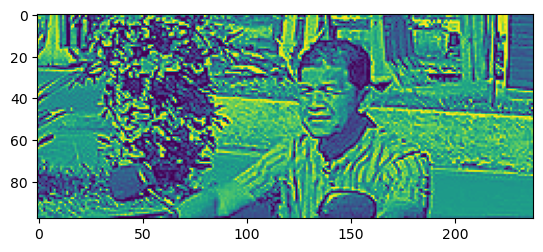

In [30]:
deblurred_img = deblur_image(image)
deblurred_img1 = cv2.cvtColor(deblurred_img, cv2.COLOR_BGR2GRAY)
plt.imshow(deblurred_img1)

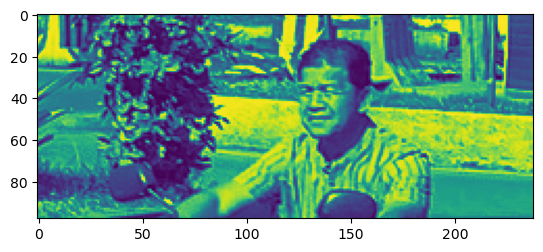

In [39]:
def enhance_contrast(image):
    # Konversi ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Histogram Equalization untuk meningkatkan kontras
    enhanced = cv2.equalizeHist(gray)
    return enhanced

def sharpen_image(image):
    # Kernel untuk meningkatkan ketajaman
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

contrast_img = enhance_contrast(image)
sharpened_img = sharpen_image(image)

plt.imshow(contrast_img)
#plt.imshow(sharpened_img)

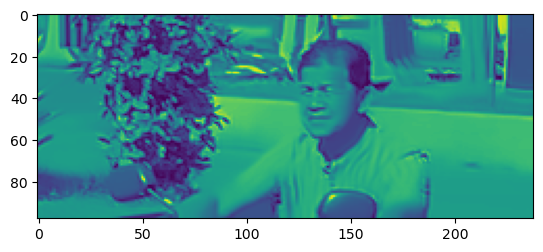

In [41]:
def denoise_image(image):
    # Menggunakan Non-Local Means Denoising
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    return denoised

# Contoh pemakaian
denoised_img = denoise_image(image)
denoised_img = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY)
plt.imshow(denoised_img)

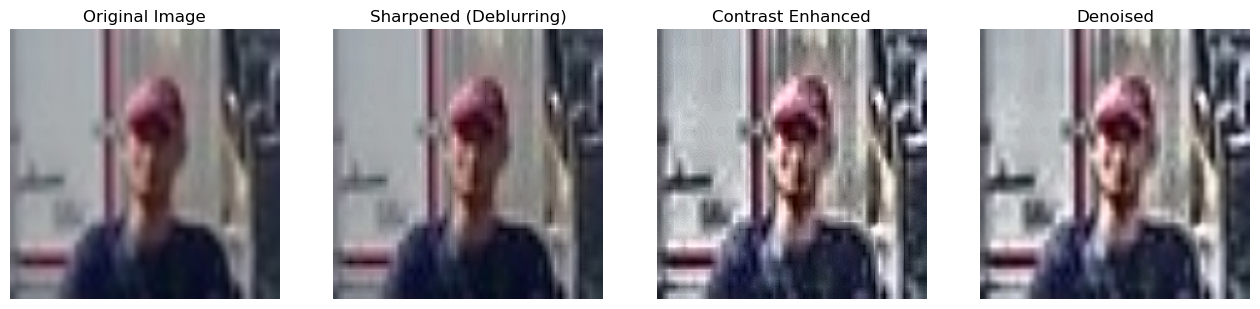

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar
img_path = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\train\\Tidak-Memakai-Helm\\image_262.jpg"  # Ganti dengan path gambar yang ingin diuji
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

if img is None:
    print("❌ Gambar tidak ditemukan!")
else:
    # Konversi ke RGB agar sesuai dengan tampilan Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # **1. Deblurring (Sharpening)**
    sharpening_kernel = np.array([[0, -1, 0], 
                                  [-1, 5, -1], 
                                  [0, -1, 0]])  # Kernel sharpening
    img_sharpened = cv2.filter2D(img_rgb, -1, sharpening_kernel)

    # **2. Contrast Enhancement menggunakan CLAHE**
    lab = cv2.cvtColor(img_sharpened, cv2.COLOR_RGB2LAB)  # Konversi ke LAB color space
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    l_enhanced = clahe.apply(l)
    lab = cv2.merge((l_enhanced, a, b))
    img_contrast = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

    # **3. Denoising menggunakan Gaussian Blur**
    img_denoised = cv2.GaussianBlur(img_contrast, (3,3), 0)

    # Tampilkan hasil preprocessing
    fig, axes = plt.subplots(1, 4, figsize=(16, 5))

    axes[0].imshow(img_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(img_sharpened)
    axes[1].set_title("Sharpened (Deblurring)")
    axes[1].axis("off")

    axes[2].imshow(img_contrast)
    axes[2].set_title("Contrast Enhanced")
    axes[2].axis("off")

    axes[3].imshow(img_denoised)
    axes[3].set_title("Denoised")
    axes[3].axis("off")

    plt.show()

    # plt.imshow(img_rgb)
    # plt.imshow(img_sharpened)
    # plt.imshow(img_contrast)
    # plt.imshow(img_denoised)

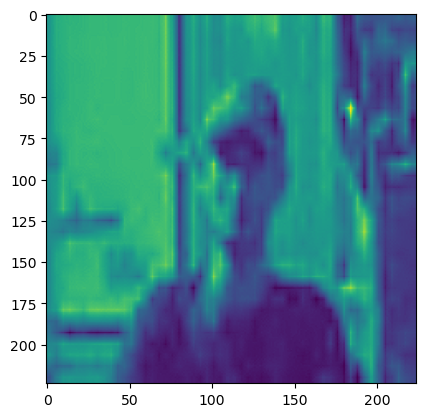

In [86]:
img_denoised = cv2.cvtColor(img_sharpened, cv2.COLOR_RGB2GRAY)
plt.imshow(img_denoised)

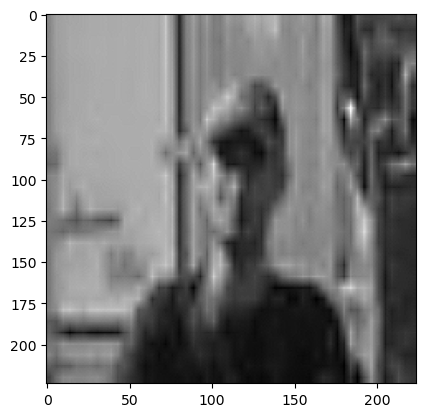

In [87]:
plt.imshow(img_denoised, cmap='gray')

In [88]:
ret,thresh1 = cv2.threshold(img_denoised,127,255,cv2.THRESH_BINARY)

In [83]:
ret

127.0

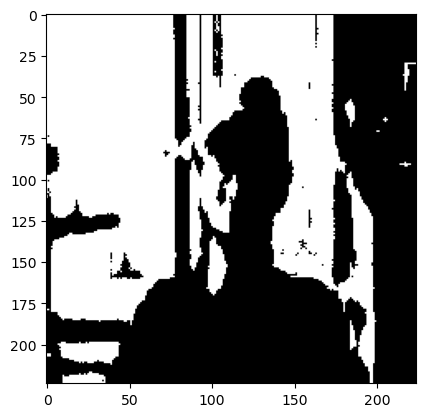

In [89]:
plt.imshow(thresh1,cmap='gray')

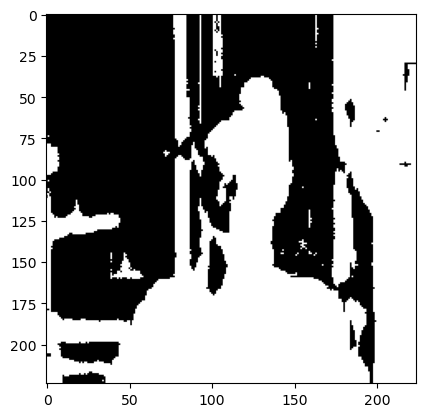

In [90]:
ret,thresh2 = cv2.threshold(img_denoised,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')

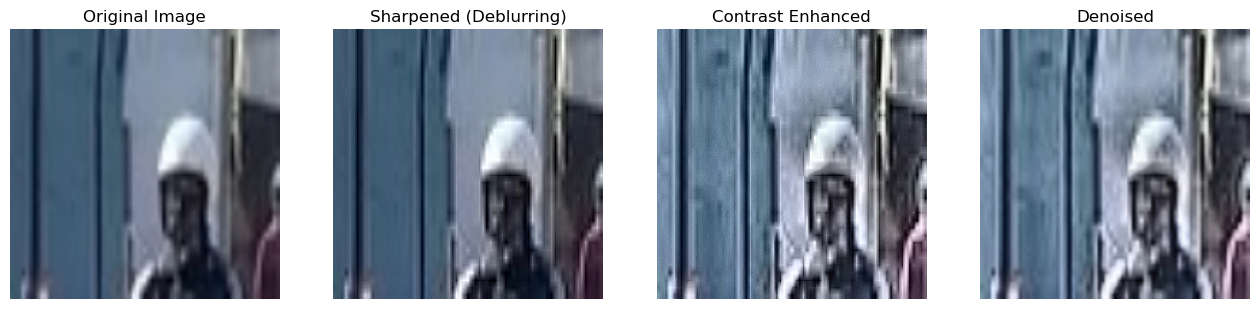

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar
img_path = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\train\\Memakai-Helm\\head_0450.jpg"  # Ganti dengan path gambar yang ingin diuji
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

if img is None:
    print("❌ Gambar tidak ditemukan!")
else:
    # Konversi ke RGB agar sesuai dengan tampilan Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # **1. Deblurring (Sharpening)**
    sharpening_kernel = np.array([[0, -1, 0], 
                                  [-1, 5, -1], 
                                  [0, -1, 0]])  # Kernel sharpening
    img_sharpened = cv2.filter2D(img_rgb, -1, sharpening_kernel)

    # **2. Contrast Enhancement menggunakan CLAHE**
    lab = cv2.cvtColor(img_sharpened, cv2.COLOR_RGB2LAB)  # Konversi ke LAB color space
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    l_enhanced = clahe.apply(l)
    lab = cv2.merge((l_enhanced, a, b))
    img_contrast = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

    # **3. Denoising menggunakan Gaussian Blur**
    img_denoised = cv2.GaussianBlur(img_contrast, (3,3), 0)

    # Tampilkan hasil preprocessing
    fig, axes = plt.subplots(1, 4, figsize=(16, 5))

    axes[0].imshow(img_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(img_sharpened)
    axes[1].set_title("Sharpened (Deblurring)")
    axes[1].axis("off")

    axes[2].imshow(img_contrast)
    axes[2].set_title("Contrast Enhanced")
    axes[2].axis("off")

    axes[3].imshow(img_denoised)
    axes[3].set_title("Denoised")
    axes[3].axis("off")

    plt.show()

    # plt.imshow(img_rgb)
    # plt.imshow(img_sharpened)
    # plt.imshow(img_contrast)
    # plt.imshow(img_denoised)

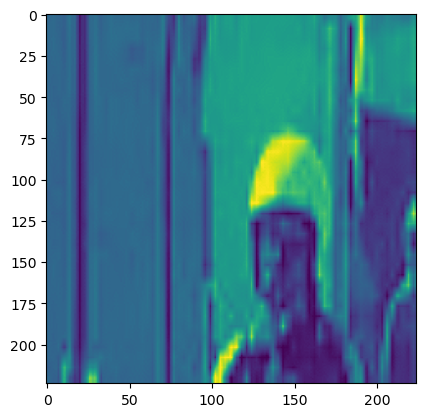

In [92]:
img_denoised = cv2.cvtColor(img_sharpened, cv2.COLOR_RGB2GRAY)
plt.imshow(img_denoised)

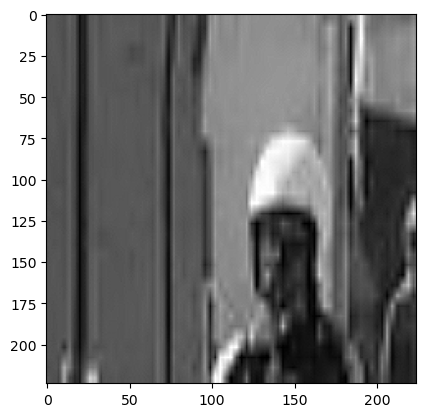

In [93]:
plt.imshow(img_denoised, cmap='gray')

In [94]:
ret,thresh1 = cv2.threshold(img_denoised,127,255,cv2.THRESH_BINARY)

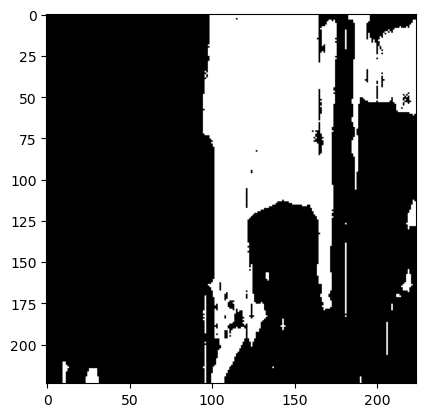

In [95]:
plt.imshow(thresh1,cmap='gray')

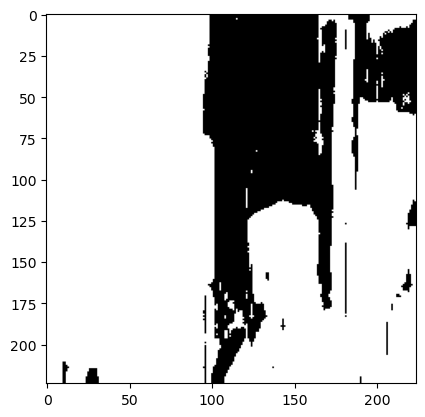

In [96]:
ret,thresh2 = cv2.threshold(img_denoised,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')

In [107]:
sobelx = cv2.Sobel(img_denoised,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img_denoised,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img_denoised,cv2.CV_64F)

In [108]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

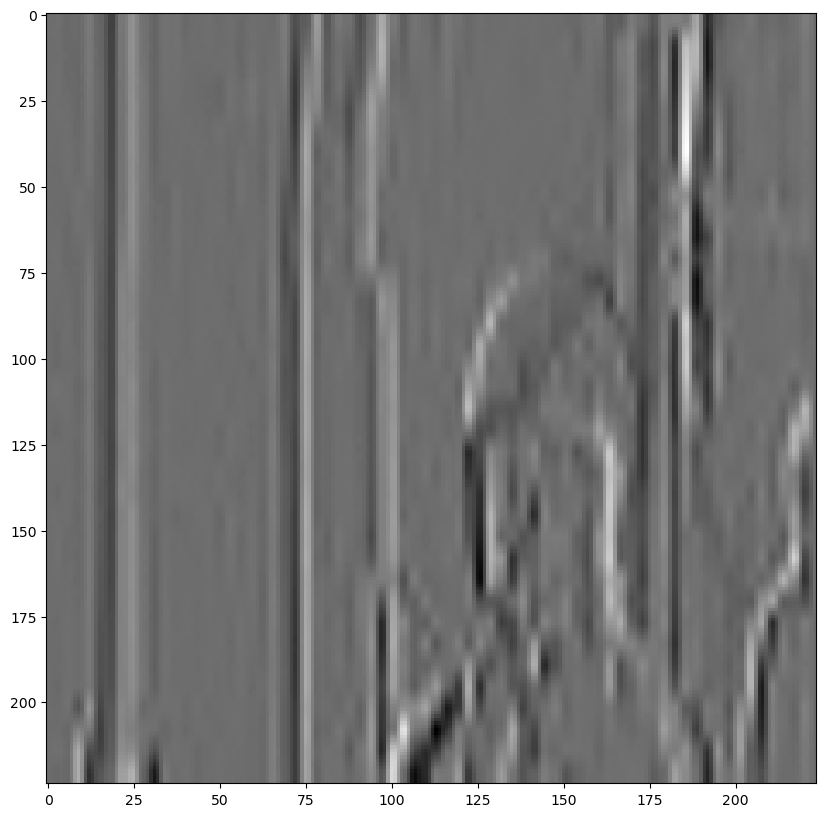

In [109]:
display_img(sobelx)

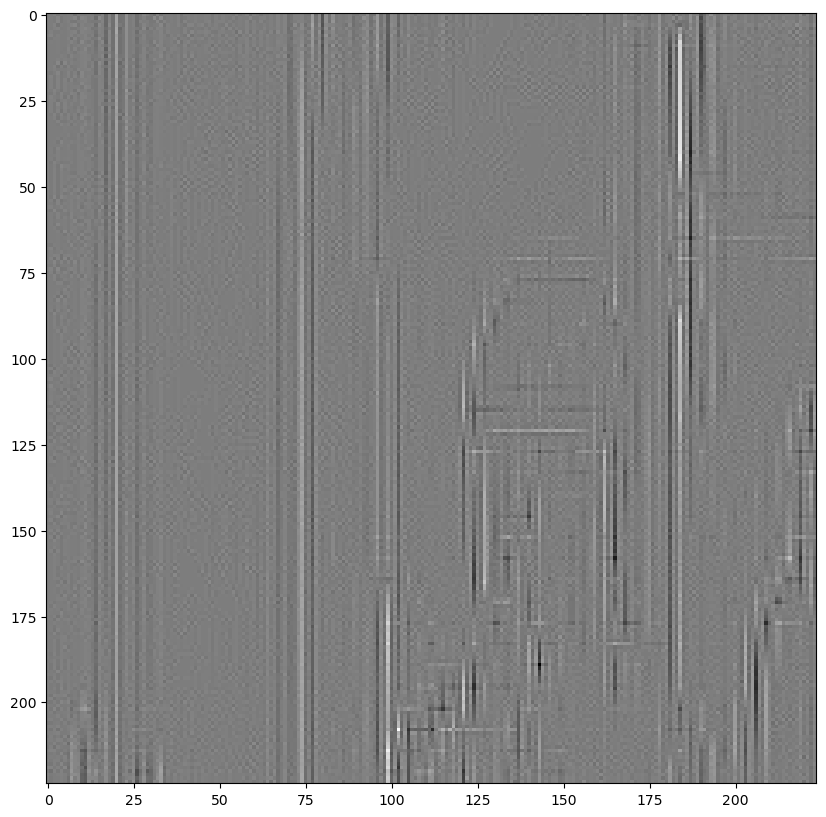

In [110]:
display_img(laplacian)

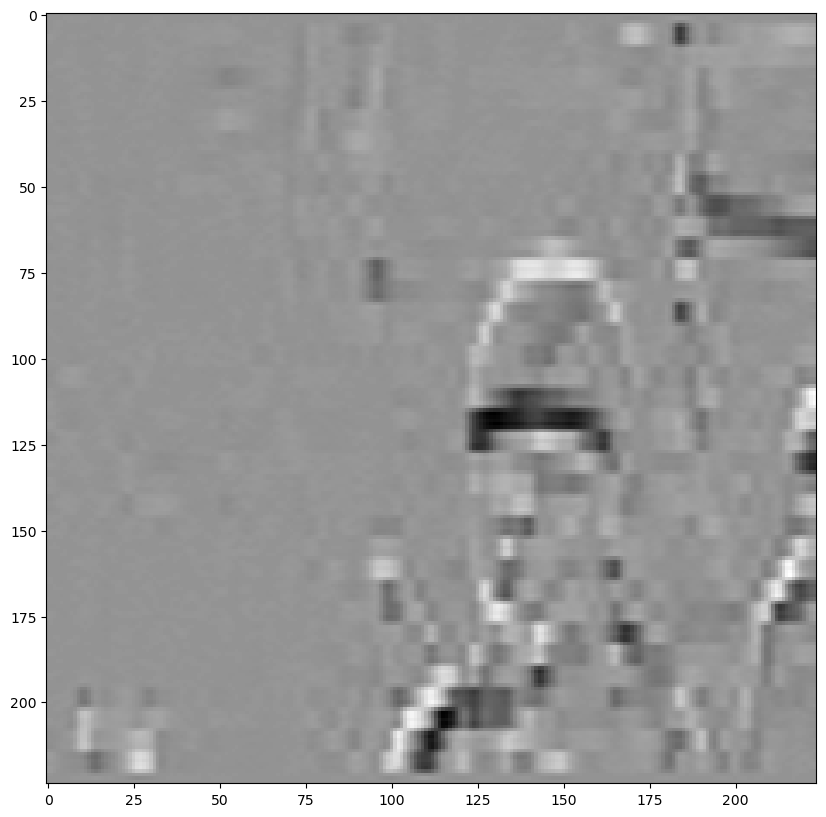

In [112]:
display_img(sobely)

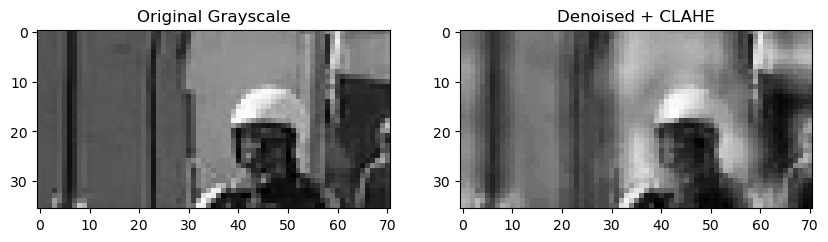

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar
image_path = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\train\\Memakai-Helm\\head_0450.jpg"  # Sesuaikan path gambar
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Denoising menggunakan Bilateral Filter
denoised = cv2.bilateralFilter(gray, d=9, sigmaColor=75, sigmaSpace=75)

# 2. Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(denoised)

# Tampilkan hasil sebelum & sesudah processing
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Original Grayscale")
axes[1].imshow(enhanced, cmap='gray')
axes[1].set_title("Denoised + CLAHE")
plt.show()


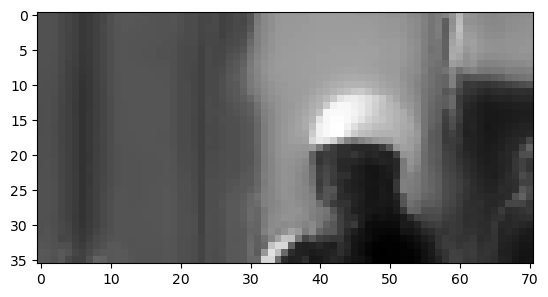

In [117]:
denoised = cv2.bilateralFilter(gray, d=9, sigmaColor=75, sigmaSpace=75)
plt.imshow(denoised, cmap='gray')

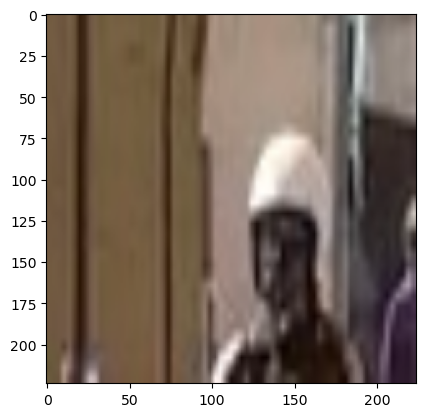

In [140]:
import cv2
import numpy as np
image_path = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\train\\Memakai-Helm\\head_0450.jpg"
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))
plt.imshow(img)

In [3]:
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])  # Kernel sharpening
    return cv2.filter2D(image, -1, kernel)

In [4]:
sharp_image = sharpen_image(img)
plt.imshow(sharp_image)

NameError: name 'img' is not defined

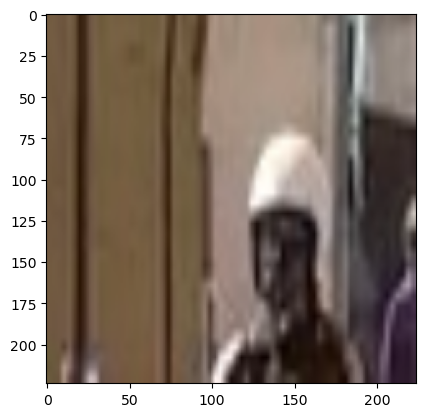

In [143]:
plt.imshow(img)

In [ ]:
def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

In [6]:
def enhance_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    
    lab = cv2.merge((cl, a, b))
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

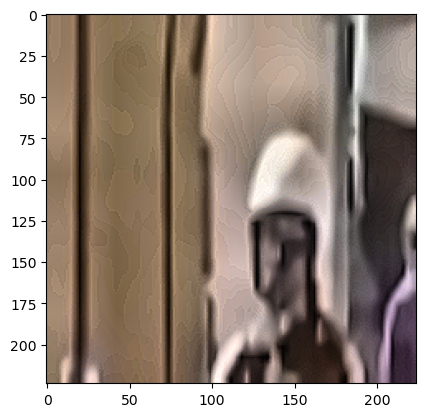

In [ ]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = remove_noise(image)  # Noise Reduction
    image = sharpen_image(image)  # Sharpening
    image = enhance_contrast(image)  # Contrast Enhancement
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    plt.imshow(image)

    return image

image1 = preprocess_image("D:\\TA_Lalu Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\train\\Memakai-Helm\\head_0450.jpg")

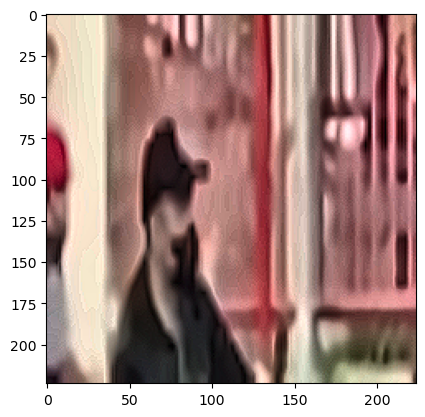

In [8]:
image2 = preprocess_image("D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\train\\Tidak-Memakai-Helm\\image_207.jpg")

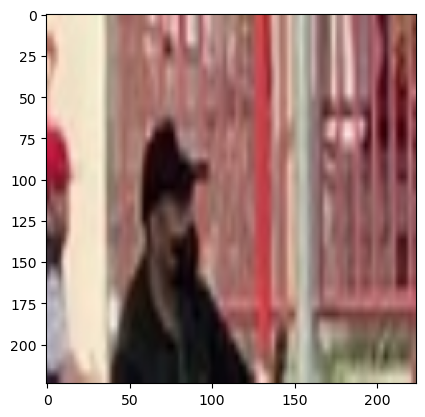

In [15]:
img = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\train\\Tidak-Memakai-Helm\\image_207.jpg"
img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
plt.imshow(img)

In [18]:
import os
import cv2
import numpy as np
import shutil

# Fungsi untuk menghapus noise
def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

# Fungsi untuk meningkatkan kontras
def enhance_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    
    lab = cv2.merge((cl, a, b))
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

# Fungsi untuk mempertajam gambar
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])  # Kernel sharpening
    return cv2.filter2D(image, -1, kernel)

# Fungsi untuk memproses dan menyimpan gambar hasil preprocessing
def preprocess_and_save_images(source_folder, destination_folder):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for root, _, files in os.walk(source_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                
                if img is None:
                    print(f"❌ Gagal membaca gambar: {img_path}")
                    continue
                
                img = cv2.resize(img, (224, 224))  # Resize agar seragam
                img = remove_noise(img)
                img = sharpen_image(img)
                img = enhance_contrast(img)
                # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Tentukan path penyimpanan di folder tujuan
                relative_path = os.path.relpath(img_path, source_folder)
                save_path = os.path.join(destination_folder, relative_path)

                os.makedirs(os.path.dirname(save_path), exist_ok=True)
                cv2.imwrite(save_path, img)

                print(f"✅ Diproses & Disimpan: {save_path}")

# Path dataset asli dan tujuan
source_folder = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\train\\Memakai-Helm"
destination_folder = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_preprocessed\\train\\Memakai-Helm"

source_folder1 = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\train\\Tidak-Memakai-Helm"
destination_folder1 = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_preprocessed\\train\\Tidak-Memakai-Helm"

source_folder2 = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\test\\Tidak-Memakai-Helm"
destination_folder2 = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_preprocessed\\test\\Tidak-Memakai-Helm"

source_folder3 = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_split\\test\\Memakai-Helm"
destination_folder3 = "D:\\TA_Lalu_Lintas\\TA-Lalu-Lintas\\dataset_cnn_preprocessed\\test\\Memakai-Helm"

# Jalankan preprocessing
preprocess_and_save_images(source_folder, destination_folder)
preprocess_and_save_images(source_folder1, destination_folder1)
preprocess_and_save_images(source_folder2, destination_folder2)
preprocess_and_save_images(source_folder3, destination_folder3)


✅ Diproses & Disimpan: D:\TA_Lalu_Lintas\TA-Lalu-Lintas\dataset_cnn_preprocessed\train\Memakai-Helm\head_0001.jpg
✅ Diproses & Disimpan: D:\TA_Lalu_Lintas\TA-Lalu-Lintas\dataset_cnn_preprocessed\train\Memakai-Helm\head_0002.jpg
✅ Diproses & Disimpan: D:\TA_Lalu_Lintas\TA-Lalu-Lintas\dataset_cnn_preprocessed\train\Memakai-Helm\head_0003.jpg
✅ Diproses & Disimpan: D:\TA_Lalu_Lintas\TA-Lalu-Lintas\dataset_cnn_preprocessed\train\Memakai-Helm\head_0006.jpg
✅ Diproses & Disimpan: D:\TA_Lalu_Lintas\TA-Lalu-Lintas\dataset_cnn_preprocessed\train\Memakai-Helm\head_0007.jpg
✅ Diproses & Disimpan: D:\TA_Lalu_Lintas\TA-Lalu-Lintas\dataset_cnn_preprocessed\train\Memakai-Helm\head_0011.jpg
✅ Diproses & Disimpan: D:\TA_Lalu_Lintas\TA-Lalu-Lintas\dataset_cnn_preprocessed\train\Memakai-Helm\head_0012.jpg
✅ Diproses & Disimpan: D:\TA_Lalu_Lintas\TA-Lalu-Lintas\dataset_cnn_preprocessed\train\Memakai-Helm\head_0013.jpg
✅ Diproses & Disimpan: D:\TA_Lalu_Lintas\TA-Lalu-Lintas\dataset_cnn_preprocessed\train\M